# PART 3 - Data Analysis and Feature Engineering

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

# Set graph to sns style
sns.set()

In [2]:
# Allow jupyter notebook to display all rows and columns
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

In [3]:
train_cleaned = pd.read_csv('../data/train_cleaned.csv')

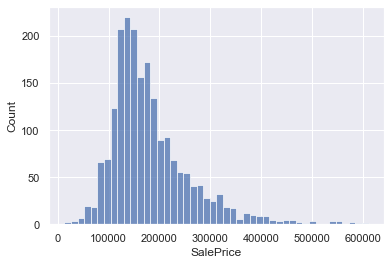

In [4]:
sns.histplot(data=train_cleaned, x='SalePrice');

In [5]:
train_cleaned['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

## Correlation Between Features

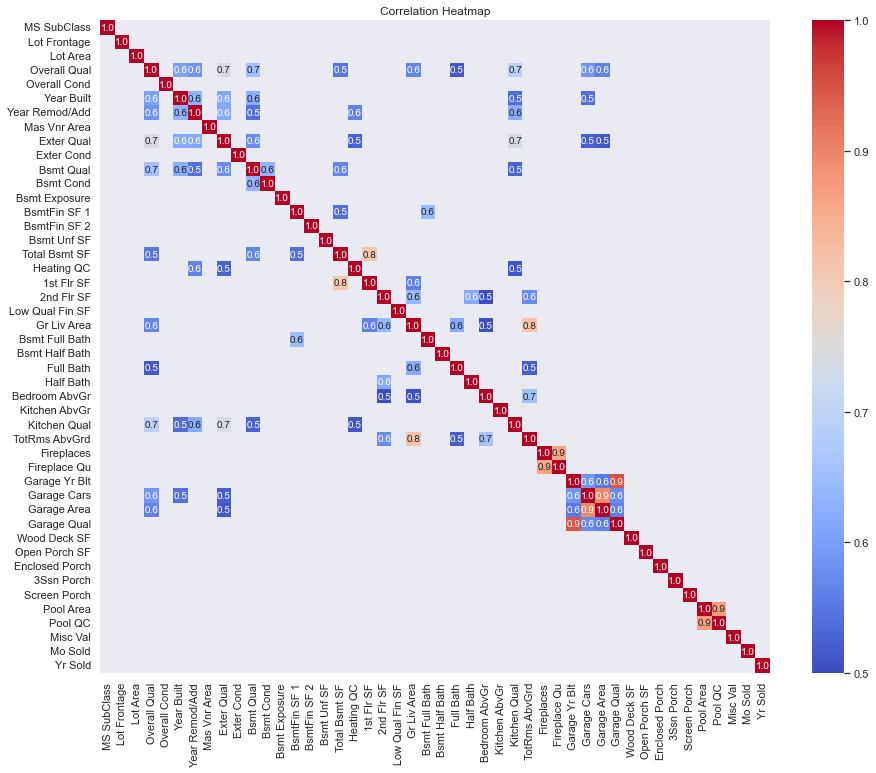

In [6]:
# Create correlation matrix from train data excluding `SalePrice`
corr_mat = train_cleaned.iloc[:, :-1].corr()

# Select correlations greater than 0.5
high_corr_mat = corr_mat[abs(corr_mat) >= 0.5]

# Plot correlation heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(high_corr_mat, annot=True, fmt='.1f',
            cmap='coolwarm', vmin=0.5, vmax=1)
title = plt.title('Correlation Heatmap')

Multicollinearity refers to independant features that are highly correlated with each other. This is undesireable as it could affect the modelling negatively.

In [7]:
correlations = train_cleaned.corr()
cut_off = 0.5
high_corrs = correlations[correlations.abs() > cut_off][correlations.abs() != 1].unstack().dropna().to_dict()
high_corrs = pd.Series(high_corrs, index = high_corrs.keys())
high_corrs = high_corrs.reset_index()
high_corrs = pd.DataFrame(high_corrs)
high_corrs.columns = ['Attribute_1', 'Attribute_2','Correlations']
high_corrs['Correlations'] = high_corrs['Correlations'].drop_duplicates(keep ='first')
high_corrs = high_corrs.dropna().sort_values(by = 'Correlations', ascending = False)

In [8]:
# identify multicollinearity
high_corrs

,Attribute_1,Attribute_2,Correlations
94,Garage Yr Blt,Garage Qual,0.947216
99,Garage Cars,Garage Area,0.893226
111,Pool Area,Pool QC,0.867751
89,Fireplaces,Fireplace Qu,0.859734
66,Gr Liv Area,TotRms AbvGrd,0.813333
49,Total Bsmt SF,1st Flr SF,0.808351
10,Overall Qual,SalePrice,0.800207
2,Overall Qual,Exter Qual,0.740257
31,Exter Qual,Kitchen Qual,0.730562
34,Exter Qual,SalePrice,0.712146


C:\Users\hoven\AppData\Local\Temp\ipykernel_16096\2513298145.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(train_cleaned[best_corr_features].corr(), dtype=np.bool)


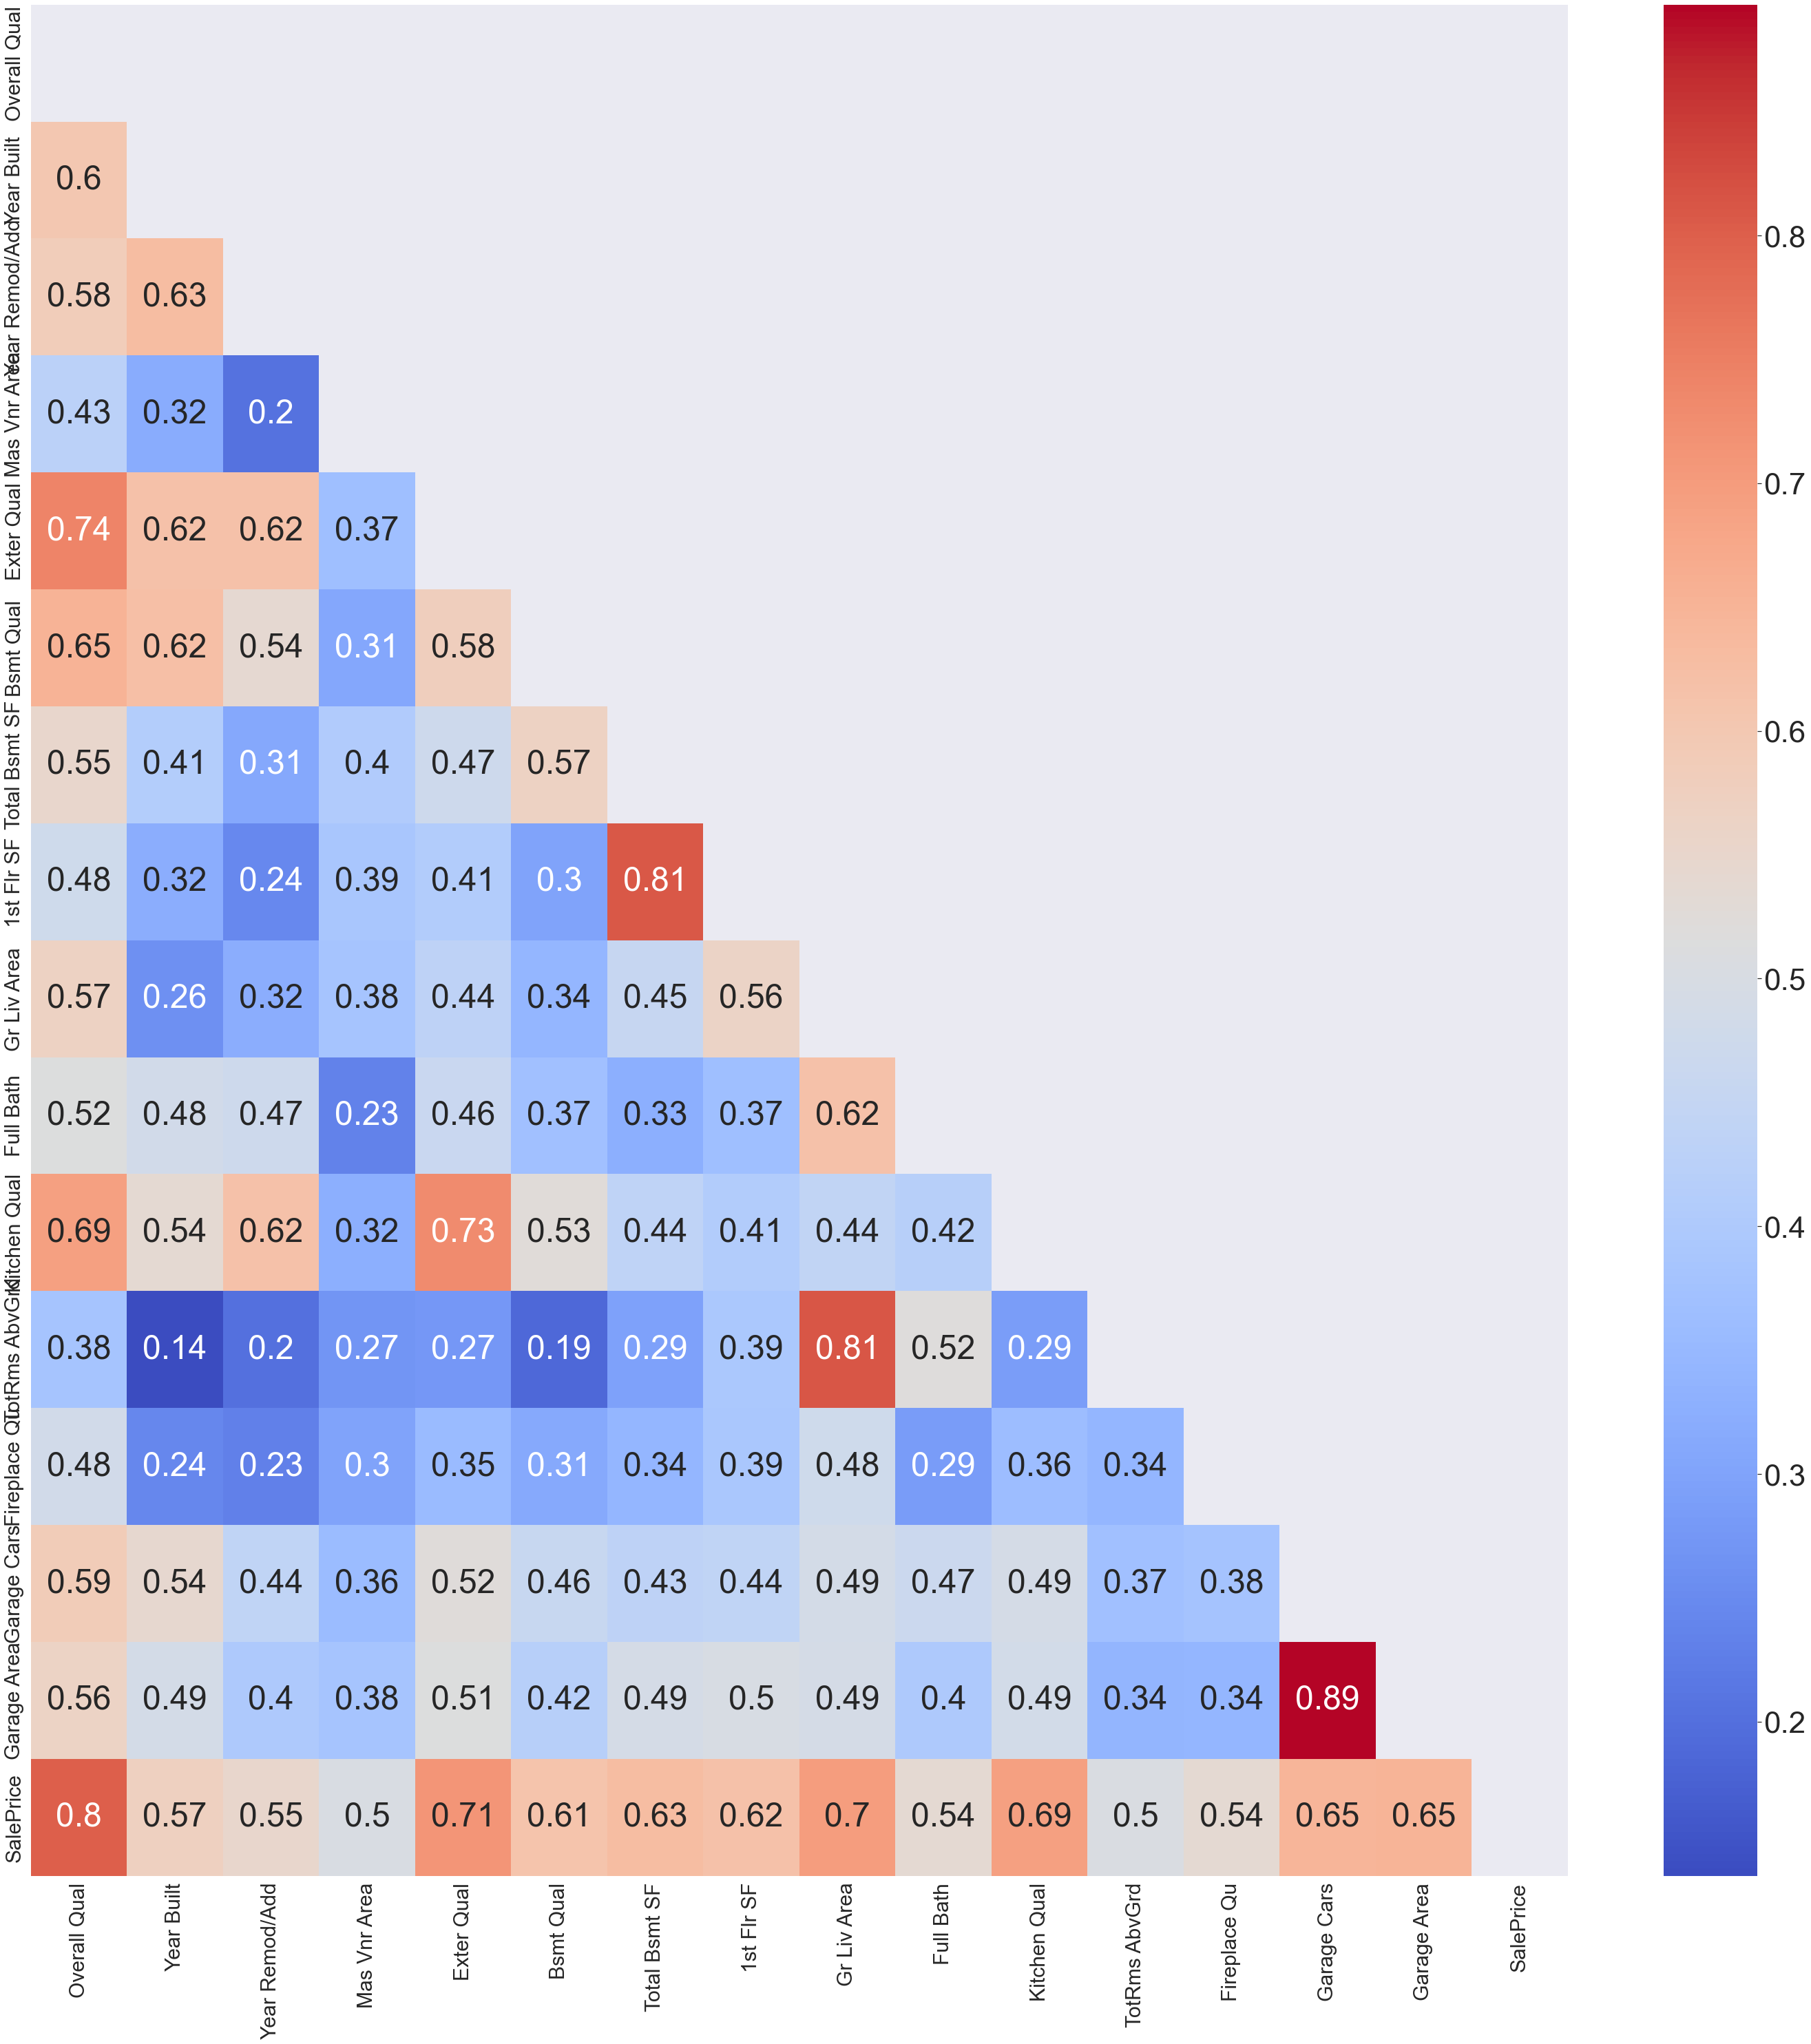

In [84]:
corrmat = train_cleaned.corr()
best_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]

# Set the default matplotlib figure size to 20x14:
fix, ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=4)

# Generate a mask for the upper triangle
mask = np.zeros_like(train_cleaned[best_corr_features].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns.
ax = sns.heatmap(train_cleaned[best_corr_features].corr(), mask=mask, ax=ax, cmap="coolwarm", annot=True)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=30)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=30);

To avoid multicollinearity, the highly correlated features will be dropped except for those that are higly correated with sale price.

In [10]:
train_cleaned.corr().index[abs(train_cleaned.corr()["SalePrice"])>0.5]

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'Exter Qual', 'Bsmt Qual', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area',
       'Full Bath', 'Kitchen Qual', 'TotRms AbvGrd', 'Fireplace Qu',
       'Garage Cars', 'Garage Area', 'SalePrice'],
      dtype='object')

In [11]:
# drop variables with multi colinearity
train_cleaned.drop(columns=['Garage Yr Blt','Garage Cond','Garage Qual','Heating QC','Pool QC','Fireplaces'],inplace=True)

In [12]:
sorted(train_cleaned.corr().to_dict()['SalePrice'].items(), key=lambda x: x[1], reverse=True)

[('SalePrice', 1.0),
 ('Overall Qual', 0.8002068702531393),
 ('Exter Qual', 0.7121457238137716),
 ('Gr Liv Area', 0.6970384443056613),
 ('Kitchen Qual', 0.6923363531071017),
 ('Garage Area', 0.6502090480849055),
 ('Garage Cars', 0.6482247414107218),
 ('Total Bsmt SF', 0.6293030962146706),
 ('1st Flr SF', 0.6184861410533949),
 ('Bsmt Qual', 0.6121879016004274),
 ('Year Built', 0.5718488959135766),
 ('Year Remod/Add', 0.550369648819556),
 ('Fireplace Qu', 0.5389250511538698),
 ('Full Bath', 0.5379691021121237),
 ('TotRms AbvGrd', 0.5040143180735323),
 ('Mas Vnr Area', 0.5035287654160441),
 ('Bsmt Exposure', 0.4259337861210426),
 ('BsmtFin SF 1', 0.42385591339467826),
 ('Open Porch SF', 0.3334760297920542),
 ('Wood Deck SF', 0.3264897021896556),
 ('Lot Frontage', 0.32066550244412734),
 ('Lot Area', 0.2965658323667791),
 ('Bsmt Full Bath', 0.28333232871961794),
 ('Half Bath', 0.28300069798833244),
 ('2nd Flr SF', 0.2484515301311421),
 ('Bsmt Cond', 0.22507538211977873),
 ('Bsmt Unf SF', 0.

## Categorical Features

In [13]:
cont_features = ['Overall Qual','Exter Qual','Gr Liv Area','Kitchen Qual','Garage Area',
                 'Garage Cars','Total Bsmt SF','1st Flr SF','Bsmt Qual','Year Built',
                 'Year Remod/Add','Fireplace Qu','Full Bath','TotRms AbvGrd','Mas Vnr Area']

In [14]:
# Determine features that have an "object" dtypes and assign a variable
#categorical = [i for i in train_cleaned if train[i].dtype == 'O']
categorical = train_cleaned.select_dtypes(include=['object']).columns

C:\Users\hoven\Anaconda3\envs\dsi-sg\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

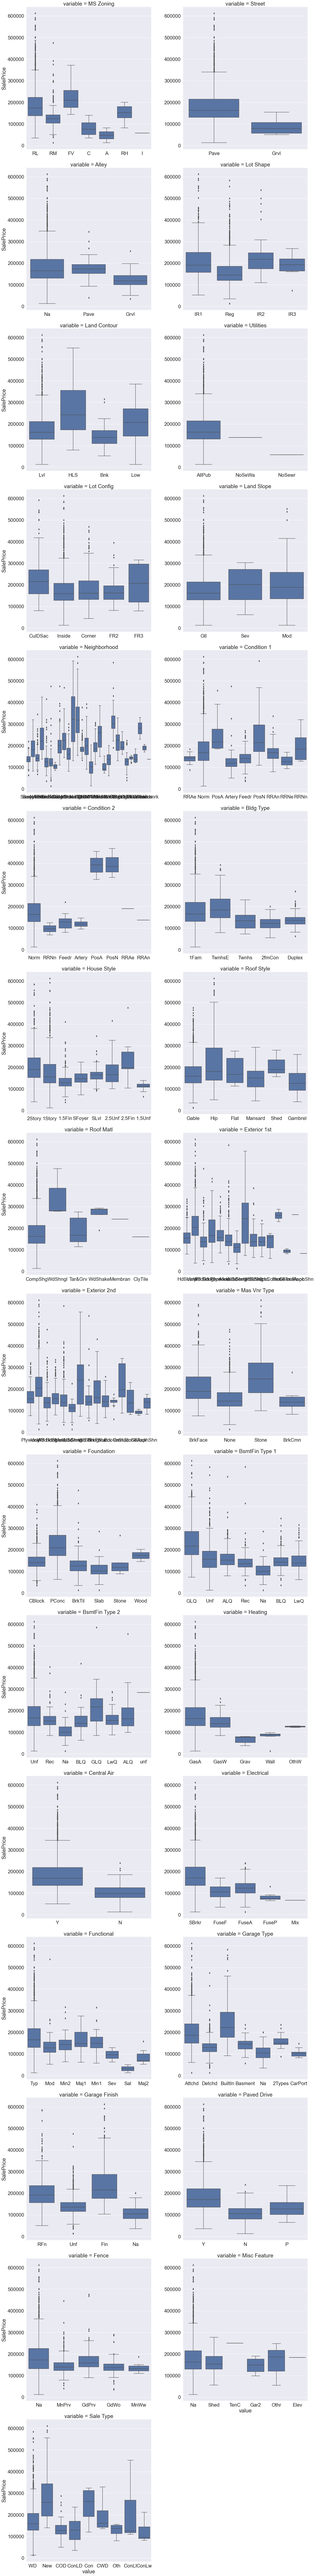

In [87]:
sns.set(font_scale=2)
f = pd.melt(train_cleaned, id_vars = 'SalePrice', value_vars = categorical)
g = sns.FacetGrid(f, col = "variable",  col_wrap = 2, sharex = False, sharey = False, height = 10)
g.map(sns.boxplot, 'value', 'SalePrice');
plt.tight_layout

In [16]:
# assign variable to the dataframe of the list of categorical features
categorical_feature = train_cleaned[categorical]

## One-Hot Encoding on Categorical Features
---

In [17]:
# one-hot encoding for all categorical features
categorical_feature = pd.concat([pd.get_dummies(train_cleaned[feat],prefix=feat) for feat in train_cleaned if train_cleaned[feat].dtype == 'O'], axis=1)

In [18]:
# concatenate continuous and categorical features
features = pd.concat([train_cleaned[cont_features],categorical_feature],axis=1)

In [19]:
# take a look at the number of features and observations of the whole dataframe
features.shape

(2051, 225)

## Modelling
---

### Model Prep: Create our features matrix (`X`) and target vector (`y`)

In [20]:
# create X and y variables
X_base = features
y = train_cleaned['SalePrice']

In [21]:
# split x and y variables into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_base, y, random_state=0)

In [22]:
# fit a standard scaler to X_train and transform both X_train and X_test
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Instantiate our models

In [23]:
lasso = LassoCV()

In [24]:
# baseline R^2 score for the model
cross_val_score(lasso, X_train, y_train, cv=3).mean()

0.8686141609852992

In [25]:
# fit lasso using training set
lasso.fit(X_train,y_train)
# training score
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
# testing score
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

Training set score: 0.91
Test set score: 0.81


### Using Recursive Feature Elimination to determine highly relevant features

In [26]:
rfe = RFE(lasso,n_features_to_select=25)
rfe_fit = rfe.fit(X_train,y_train)
dfsupport = pd.DataFrame(rfe_fit.support_)
dfranking = pd.DataFrame(rfe_fit.ranking_)
dfcolumns = pd.DataFrame(X_base.columns)

# concat two dataframes
featureScores = pd.concat([dfcolumns,dfsupport,dfranking],axis=1)

# Rename columns
featureScores.columns = ['Feature','Selection','Rank']

featureScores

,Feature,Selection,Rank
0,Overall Qual,True,1
1,Exter Qual,True,1
2,Gr Liv Area,True,1
3,Kitchen Qual,True,1
4,Garage Area,True,1
5,Garage Cars,False,21
6,Total Bsmt SF,True,1
7,1st Flr SF,True,1
8,Bsmt Qual,True,1
9,Year Built,False,3


In [68]:
# Select the top 25 features and make it a dataframe
top_25 = featureScores.loc[featureScores['Selection']==True]

In [69]:
# make the top 25 features into a list
best_feature = [i for i in top_25['Feature']]

In [70]:
best_feature.remove('Neighborhood_GrnHill')
best_feature.remove('Misc Feature_Elev')

In [71]:
# create a new X variable with our best features
X = features[best_feature]

In [72]:
# split X and y variables into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [73]:
# fit a standard scaler to X_train and transform both X_train and X_test
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [74]:
# R^2 score for the model
cross_val_score(lasso, X_train, y_train, cv=10).mean()

0.8525712472849583

In [75]:
# fit lasso using training set
model_lasso = lasso.fit(X_train,y_train)
# training score
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
# testing score
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.87
Test set score: 0.81
Number of features used: 23


In [76]:
pred_lasso = lasso.predict(X_test)

Instantiate a linear and ridge regression

In [77]:
lr = LinearRegression()

In [78]:
# R^2 score for the model
cross_val_score(lr, X_train, y_train, cv=10).mean()

0.8526855304673898

In [79]:
# fit linear using training set
model_lr = lr.fit(X_train,y_train)
# training score
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
# testing score
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lr.coef_ != 0)))

Training set score: 0.87
Test set score: 0.81
Number of features used: 23


In [80]:
pred_lr = lr.predict(X_test)

In [81]:
ridge = RidgeCV()

In [82]:
# R^2 score for the model
cross_val_score(ridge, X_train, y_train, cv=10).mean()

0.8529567784203561

In [83]:
# fit ridge using training set
model_ridge = ridge.fit(X_train,y_train)
# training score
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
# testing score
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(ridge.coef_ != 0)))

Training set score: 0.87
Test set score: 0.81
Number of features used: 23


Based on the models used, lasso gives the best score when tested against the holdout set. 

In [64]:
pred_ridge = ridge.predict(X_test)

In [65]:
test_cleaned = pd.read_csv('../data/test_cleaned.csv')

In [66]:
# isolate all features that have an "object" dtypes and assign a variable
#categorical_test = [i for i in test if test_cleaned[i].dtype == 'O']

categorical_test = test_cleaned.select_dtypes(include=['object']).columns

In [67]:
# assign variable to the dataframe of the list of categorical features
cat_feature_test = test_cleaned[categorical_test]

In [49]:
# one-hot encoding for all categorical variables
cat_features_test = pd.concat([pd.get_dummies(test_cleaned[feat],prefix=feat) for feat in test_cleaned if test_cleaned[feat].dtype == 'O'], axis=1)

In [51]:
cont_features_test = test_cleaned.select_dtypes(exclude=['object'])

In [52]:
# concatenate continuous and categorical features into 1 dataframe
test_cleaned = pd.concat([cont_features_test,cat_features_test],axis=1)

In [54]:
ss = StandardScaler()
X = ss.fit_transform(test_cleaned[best_feature])

In [55]:
prediction = model_lasso.predict(X)

In [62]:
# for submission
submission = pd.DataFrame()
submission['Id'] = test_cleaned['Id']
submission['SalePrice'] = prediction

In [63]:
print(submission.shape)
submission.head()

(878, 2)


,Id,SalePrice
0,2658,109141.774207
1,2718,177246.324600
2,2414,214753.164760
3,1989,129920.363842
4,625,187374.245268


In [58]:
# export file
submission.to_csv('../data/submission.csv',index=False)

* Kaggle result 

Score: 31005.07159  
Private score: 24946.82658

## Conclusion

Based on the dataset provided, there were a large number of null values. These values were either dropped or filled in with logical explaination behind them. Several features were also identified as the important feature in making good prediction. Through performing EDA, several features found to be multicollinearity and removed as they are considered undesirable to the overall prediction. Feature engineering was also performed and several features were created that are thought to be related with each other.

The models, Linear Regression, Lasso and Ridge were used to evaluate to determine which produces the result. Overall, Linear Regression seems to perform the best.